In [3]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import gc
import os

In [4]:
print(os.listdir("/Users/jill_jewelry/Documents/MSDA/ANA665/Final Project/home-credit-default-risk"))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [5]:
Train_data = pd.read_csv('/Users/jill_jewelry/Documents/MSDA/ANA665/Final Project/home-credit-default-risk/application_train.csv')

In [6]:
print('Training data shape: ', Train_data.shape)

Training data shape:  (307511, 122)


In [7]:
Train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
Test_data = pd.read_csv('/Users/jill_jewelry/Documents/MSDA/ANA665/Final Project/home-credit-default-risk/application_test.csv')

In [9]:
print('Testing data shape: ', Test_data.shape)

Testing data shape:  (48744, 121)


In [10]:
Test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Train_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

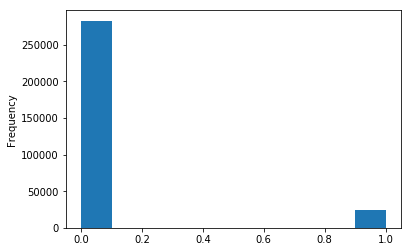

In [12]:
Train_data['TARGET'].plot.hist();

In [13]:
def mis_values(df):
    mis_value = df.isnull().sum() 
    mis_value_per = 100 * df.isnull().sum() / len(df)
    mis_value_column = pd.concat([mis_value, mis_value_per], axis=1)
    mis_val_tab_rename_cols = mis_value_column.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values'})
    mis_val_tab_rename_cols = mis_val_tab_rename_cols[mis_val_tab_rename_cols.iloc[:,1] != 0].sort_values('% of Total Missing Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"  
           
           "There are " + str(mis_val_tab_rename_cols.shape[0]) +
           " cols that have missing values.")
    return mis_val_tab_rename_cols                   

In [14]:
missing_values = mis_values(Train_data)

Your selected dataframe has 122 columns.
There are 67 cols that have missing values.


In [15]:
print(missing_values)

                              Missing Values  % of Total Missing Values
COMMONAREA_MEDI                       214865                       69.9
COMMONAREA_AVG                        214865                       69.9
COMMONAREA_MODE                       214865                       69.9
NONLIVINGAPARTMENTS_MEDI              213514                       69.4
NONLIVINGAPARTMENTS_MODE              213514                       69.4
NONLIVINGAPARTMENTS_AVG               213514                       69.4
FONDKAPREMONT_MODE                    210295                       68.4
LIVINGAPARTMENTS_MODE                 210199                       68.4
LIVINGAPARTMENTS_MEDI                 210199                       68.4
LIVINGAPARTMENTS_AVG                  210199                       68.4
FLOORSMIN_MODE                        208642                       67.8
FLOORSMIN_MEDI                        208642                       67.8
FLOORSMIN_AVG                         208642                    

In [16]:
def mis_values_test(df):
    mis_value_test = df.isnull().sum() 
    mis_value_per_test = 100 * df.isnull().sum() / len(df)
    mis_value_column_test = pd.concat([mis_value_test, mis_value_per_test], axis=1)
    mis_val_tab_rename_cols_test = mis_value_column_test.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values'})
    mis_val_tab_rename_cols_test = mis_val_tab_rename_cols_test[mis_val_tab_rename_cols_test.iloc[:,1] != 0].sort_values('% of Total Missing Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"  
           
           "There are " + str(mis_val_tab_rename_cols_test.shape[0]) +
           " cols that have missing values.")
    return mis_val_tab_rename_cols_test     

In [17]:
missing_values_test = mis_values_test(Test_data)

Your selected dataframe has 121 columns.
There are 64 cols that have missing values.


In [18]:
print(missing_values_test)

                              Missing Values  % of Total Missing Values
COMMONAREA_MODE                        33495                       68.7
COMMONAREA_MEDI                        33495                       68.7
COMMONAREA_AVG                         33495                       68.7
NONLIVINGAPARTMENTS_MEDI               33347                       68.4
NONLIVINGAPARTMENTS_AVG                33347                       68.4
NONLIVINGAPARTMENTS_MODE               33347                       68.4
FONDKAPREMONT_MODE                     32797                       67.3
LIVINGAPARTMENTS_MODE                  32780                       67.2
LIVINGAPARTMENTS_MEDI                  32780                       67.2
LIVINGAPARTMENTS_AVG                   32780                       67.2
FLOORSMIN_MEDI                         32466                       66.6
FLOORSMIN_MODE                         32466                       66.6
FLOORSMIN_AVG                          32466                    

In [19]:
Train_data.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [20]:
Train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [21]:
pd.crosstab(Train_data.TARGET, Train_data.NAME_CONTRACT_TYPE, dropna=False, normalize='all')

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
TARGET,,
0,0.829274,0.089997
1,0.075513,0.005216


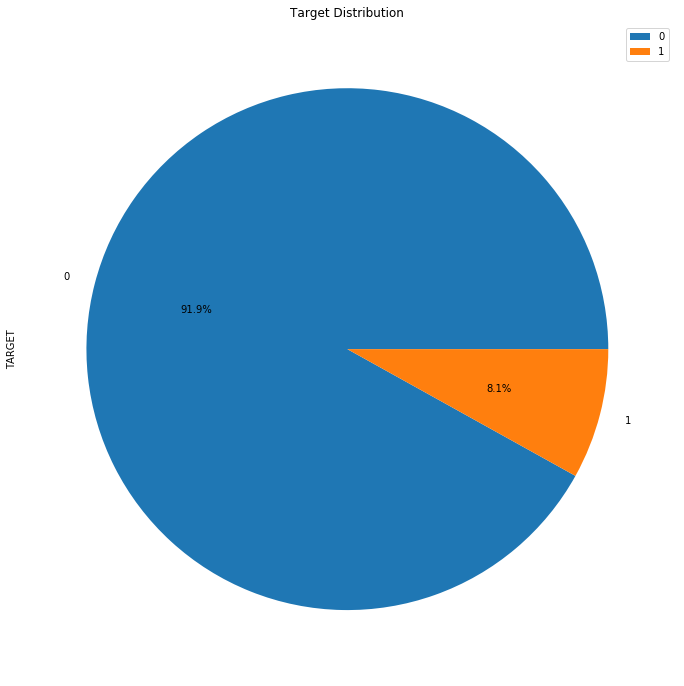

In [22]:
target_distribution = Train_data['TARGET'].value_counts()
target_distribution.plot.pie(figsize=(12, 12),
                             title='Target Distribution',
                             fontsize=10, 
                             legend=True, 
                             autopct=lambda v: "{:0.1f}%".format(v))

In [23]:
pd.crosstab(Train_data.TARGET, Train_data.CODE_GENDER, dropna=False)

CODE_GENDER,F,M,XNA
TARGET,,,
0,188278,94404,4
1,14170,10655,0


In [24]:
print('There are {0} people with realty. {1}% of them repay loans.'.format(Train_data[Train_data.FLAG_OWN_REALTY == 'Y'].
shape[0], np.round(Train_data[Train_data.FLAG_OWN_REALTY == 'Y'].TARGET.value_counts(normalize=True).values[1], 3) * 100))
print('There are {0} people with cars. {1}% of them repay loans.'.format(Train_data[Train_data.FLAG_OWN_CAR == 'Y'].shape[0], 
np.round(Train_data[Train_data.FLAG_OWN_CAR == 'Y'].TARGET.value_counts(normalize=True).values[1], 4) * 100))
print('Average age of the car is {:.2f} years.'.format(Train_data.groupby(['FLAG_OWN_CAR'])['OWN_CAR_AGE'].mean().values[1]))

There are 213312 people with realty. 8.0% of them repay loans.
There are 104587 people with cars. 7.24% of them repay loans.
Average age of the car is 12.06 years.


Text(0.5, 1.0, 'Counts of housing type')

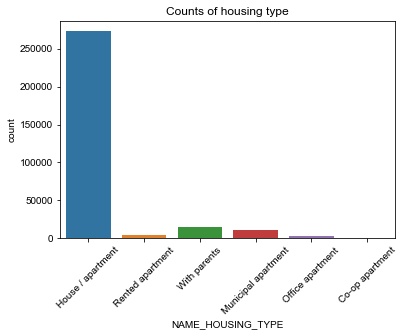

In [25]:
sns.countplot(Train_data['NAME_HOUSING_TYPE'])
sns.set_style('whitegrid');
plt.xticks(rotation=45);
plt.title('Counts of housing type')

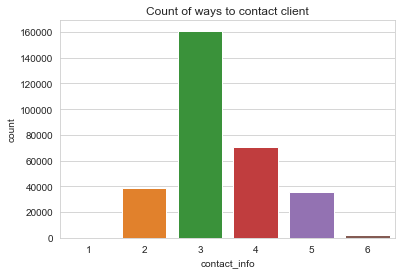

In [26]:
Train_data['contact_info'] = Train_data['FLAG_MOBIL'] + Train_data['FLAG_EMP_PHONE'] + Train_data['FLAG_WORK_PHONE'] + Train_data['FLAG_CONT_MOBILE'] + Train_data['FLAG_PHONE'] + Train_data['FLAG_EMAIL']
sns.countplot(Train_data['contact_info'])
sns.set_style('whitegrid');
plt.title('Count of ways to contact client');

In [27]:
Train_data.loc[Train_data['OBS_30_CNT_SOCIAL_CIRCLE'] > 1, 'OBS_30_CNT_SOCIAL_CIRCLE'] = '1+'
Train_data.loc[Train_data['DEF_30_CNT_SOCIAL_CIRCLE'] > 1, 'DEF_30_CNT_SOCIAL_CIRCLE'] = '1+'
Train_data.loc[Train_data['OBS_60_CNT_SOCIAL_CIRCLE'] > 1, 'OBS_60_CNT_SOCIAL_CIRCLE'] = '1+'
Train_data.loc[Train_data['DEF_60_CNT_SOCIAL_CIRCLE'] > 1, 'DEF_60_CNT_SOCIAL_CIRCLE'] = '1+'

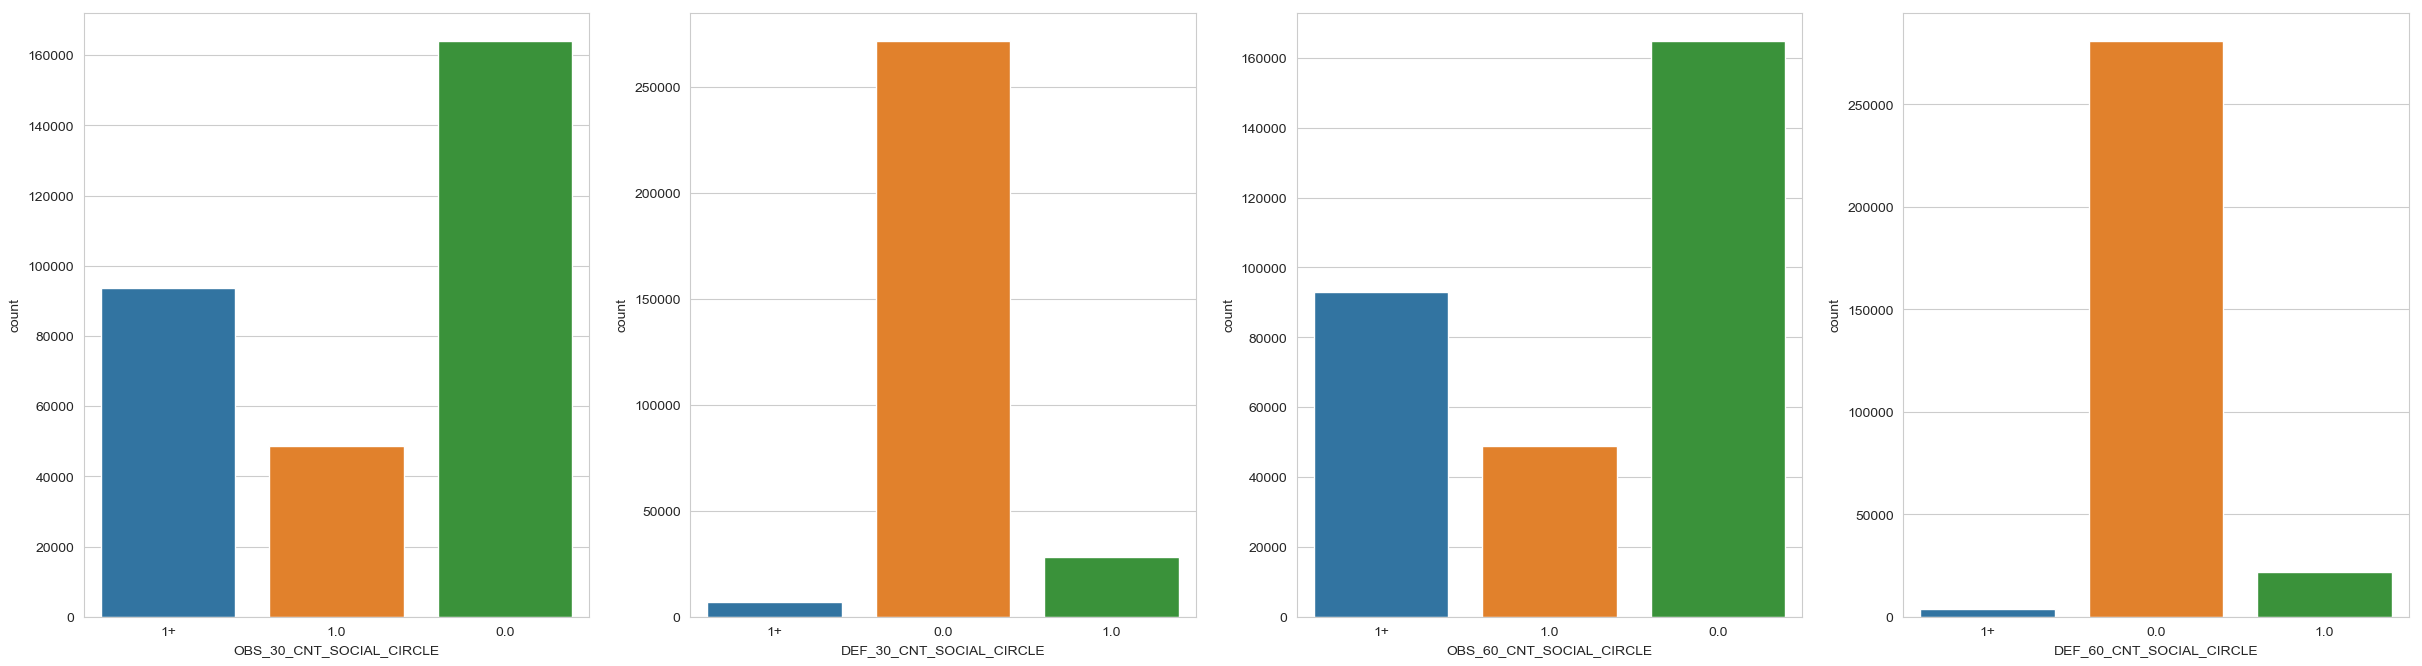

In [28]:
fig, ax = plt.subplots(figsize = (30, 8), dpi = 100)
plt.subplot(1, 4, 1)
sns.countplot(Train_data['OBS_30_CNT_SOCIAL_CIRCLE']);
plt.subplot(1, 4, 2)
sns.countplot(Train_data['DEF_30_CNT_SOCIAL_CIRCLE']);
plt.subplot(1, 4, 3)
sns.countplot(Train_data['OBS_60_CNT_SOCIAL_CIRCLE']);
plt.subplot(1, 4, 4)
sns.countplot(Train_data['DEF_60_CNT_SOCIAL_CIRCLE']);

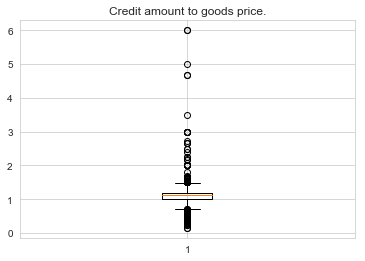

In [29]:
non_zero_good_price = Train_data[Train_data['AMT_GOODS_PRICE'].isnull() == False]
credit_to_good_price = non_zero_good_price['AMT_CREDIT'] / non_zero_good_price['AMT_GOODS_PRICE']
plt.boxplot(credit_to_good_price);
plt.title('Credit amount to goods price.');

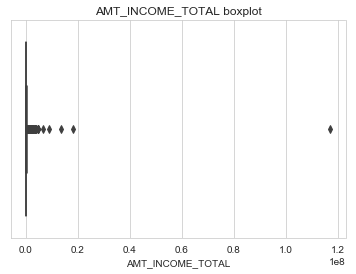

In [30]:
sns.boxplot(Train_data['AMT_INCOME_TOTAL']);
plt.title('AMT_INCOME_TOTAL boxplot');

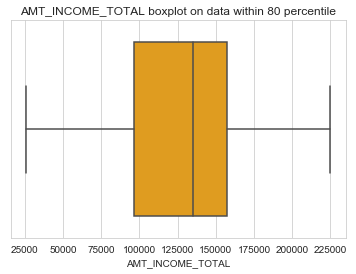

In [31]:
sns.boxplot(Train_data[Train_data['AMT_INCOME_TOTAL'] < np.percentile(Train_data['AMT_INCOME_TOTAL'], 80)]['AMT_INCOME_TOTAL'], color='Orange');
plt.title('AMT_INCOME_TOTAL boxplot on data within 80 percentile');

In [32]:
Train_data.groupby('TARGET').agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count']})

AMT_INCOME_TOTAL                  
                   mean    median   count
TARGET                                   
0         169077.722266  148500.0  282686
1         165611.760906  135000.0   24825

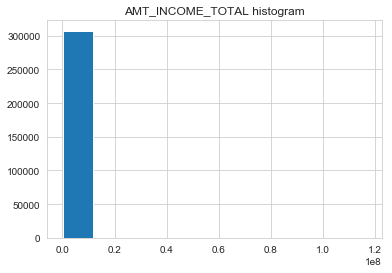

In [33]:
plt.hist(Train_data['AMT_INCOME_TOTAL']);
plt.title('AMT_INCOME_TOTAL histogram');

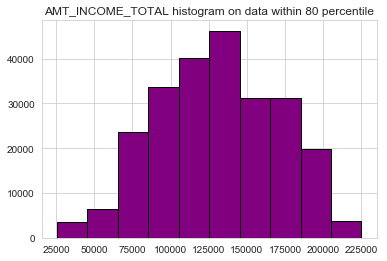

In [34]:
plt.hist(Train_data[Train_data['AMT_INCOME_TOTAL'] < np.percentile(Train_data['AMT_INCOME_TOTAL'], 80)]['AMT_INCOME_TOTAL'], edgecolor = 'black', color = 'Purple');
plt.title('AMT_INCOME_TOTAL histogram on data within 80 percentile');

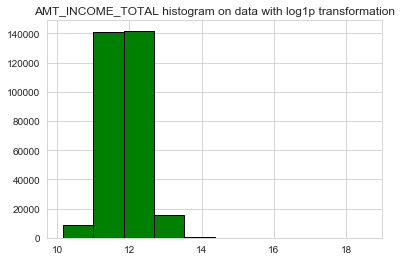

In [35]:
plt.hist(np.log1p(Train_data['AMT_INCOME_TOTAL']), edgecolor = 'black', color='Green');
plt.title('AMT_INCOME_TOTAL histogram on data with log1p transformation');

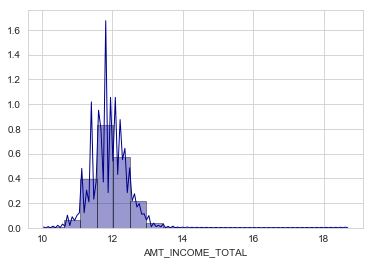

In [36]:
sns.distplot(np.log1p(Train_data['AMT_INCOME_TOTAL']), hist=True, kde=True, 
             bins=int(180/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

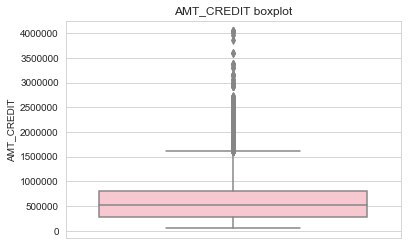

In [37]:
sns.boxplot(Train_data['AMT_CREDIT'], orient='v', color = 'Pink');
plt.title('AMT_CREDIT boxplot');

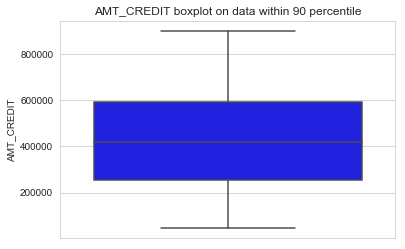

In [38]:
sns.boxplot(Train_data[Train_data['AMT_CREDIT'] < np.percentile(Train_data['AMT_CREDIT'], 80)]['AMT_CREDIT'], orient='v', color = 'Blue');
plt.title('AMT_CREDIT boxplot on data within 90 percentile');

In [39]:
Train_data.groupby('TARGET').agg({'AMT_CREDIT': ['mean', 'median', 'count']})

AMT_CREDIT                  
                 mean    median   count
TARGET                                 
0       602648.282002  517788.0  282686
1       557778.527674  497520.0   24825

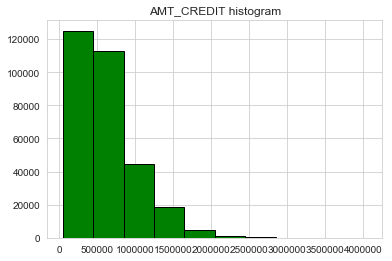

In [40]:
plt.hist(Train_data['AMT_CREDIT'], edgecolor = 'black', color = 'Green');
plt.title('AMT_CREDIT histogram');

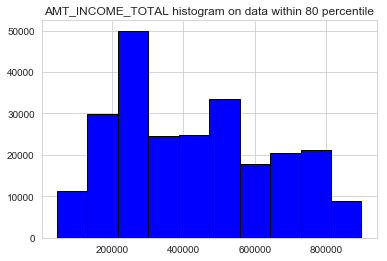

In [41]:
plt.hist(Train_data[Train_data['AMT_CREDIT'] < np.percentile(Train_data['AMT_CREDIT'], 80)]['AMT_CREDIT'], edgecolor = 'black', color = 'Blue');
plt.title('AMT_INCOME_TOTAL histogram on data within 80 percentile');

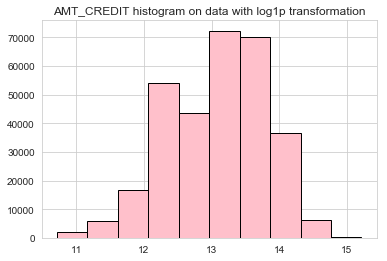

In [50]:
plt.hist(np.log1p(Train_data['AMT_CREDIT']), edgecolor = 'black', color = 'Pink');
plt.title('AMT_CREDIT histogram on data with log1p transformation');

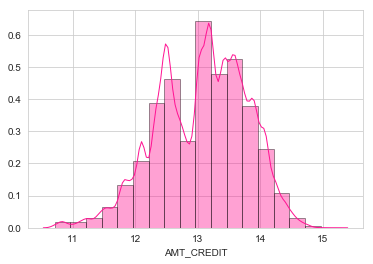

In [51]:
sns.distplot(np.log1p(Train_data['AMT_CREDIT']), hist=True, kde=True, 
             bins=int(180/10), color = 'deeppink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1});

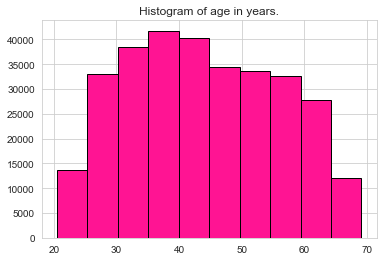

In [52]:
Train_data['age'] = Train_data['DAYS_BIRTH'] / -365
plt.hist(Train_data['age'], edgecolor = 'black', color = 'deeppink');
plt.title('Histogram of age in years.');

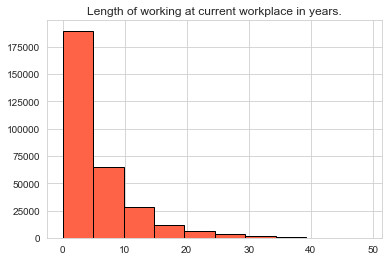

In [53]:
Train_data.loc[Train_data['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0
Train_data['years_employed'] = Train_data['DAYS_EMPLOYED'] / -365
plt.hist(Train_data['years_employed'], edgecolor ='black', color = 'Tomato');
plt.title('Length of working at current workplace in years.');

In [46]:
Train_data.groupby(['NAME_INCOME_TYPE']).agg({'years_employed': ['mean', 'median', 'count', 'max'], 'age': ['median']})

years_employed                                     age
                               mean    median   count        max     median
NAME_INCOME_TYPE                                                           
Businessman                7.874795  6.280822      10  14.917808  47.498630
Commercial associate       5.833627  4.147945   71617  48.071233  39.780822
Maternity leave            7.224110  8.273973       5  10.306849  39.350685
Pensioner                  0.002448 -0.000000   55362  35.246575  60.413699
State servant              9.454441  7.205479   21703  48.172603  40.693151
Student                    6.835160  5.069863      18  21.931507  36.663014
Unemployed                 0.000000 -0.000000      22  -0.000000  45.860274
Working                    6.446909  4.427397  158774  49.073973  39.876712

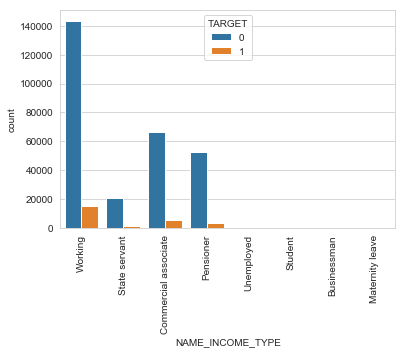

In [54]:
sns.countplot(x="NAME_INCOME_TYPE", hue = 'TARGET', data=Train_data);
plt.xticks(rotation=90);

In [55]:
Train_data.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count', 'max']})

AMT_INCOME_TOTAL  \
                                                               mean   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                        
Academic degree               Commercial associate    274688.372093   
                              Pensioner               203919.230769   
                              State servant           258847.826087   
                              Working                 226312.500000   
Higher education              Businessman             652500.000000   
                              Commercial associate    242283.998486   
                              Maternity leave         195000.000000   
                              Pensioner               171455.114974   
                              State servant           207116.161080   
                              Student                 231000.000000   
                              Unemployed              189000.000000   
                              Working                 194013.110125   
Incomplete higher             Commercial associate    206232.296029   
                              Pensioner               149437.155405   
                              State servant           173589.989610   
                              Student                 157500.000000   
                              Unemployed              126000.000000   
                              Working                 170659.490600   
Lower secondary               Commercial associate    168173.628261   
                              Pensioner               106468.010464   
                              State servant           143250.000000   
                              Working                 140070.652174   
Secondary / secondary special Commercial associate    181368.704601   
                              Maternity leave          58500.000000   
                              Pensioner               130863.482560   
                              State servant           159979.349061   
                              Student                 138681.818182   
                              Unemployed               70753.846154   
                              Working                 154261.801730   

                                                                       \
                                                       median   count   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                          
Academic degree               Commercial associate  247500.00      43   
                              Pensioner             155700.00      26   
                              State servant         225000.00      23   
                              Working               202500.00      72   
Higher education              Businessman           495000.00      10   
                              Commercial associate  202500.00   24025   
                              Maternity leave       135000.00       3   
                              Pensioner             148500.00    8188   
                              State servant         180000.00    8863   
                              Student               175500.00       6   
                              Unemployed            180000.00       6   
                              Working               174134.25   33762   
Incomplete higher             Commercial associate  180000.00    3400   
                              Pensioner             135000.00     518   
                              State servant         157500.00     770   
                              Student               157500.00       1   
                              Unemployed             63000.00       3   
                              Working               157500.00    5585   
Lower secondary               Commercial associate  144000.00     460   
                              Pensioner              90000.00    1529   
                              State servant         119250.00     102   
                          

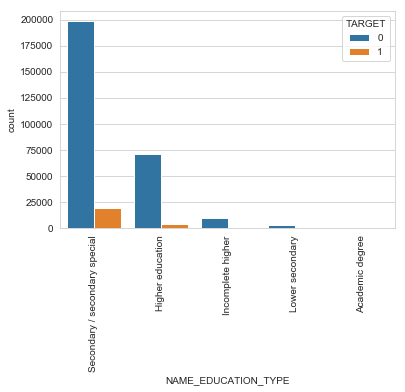

In [56]:
sns.countplot(x="NAME_EDUCATION_TYPE", hue = 'TARGET', data=Train_data);
plt.xticks(rotation=90);

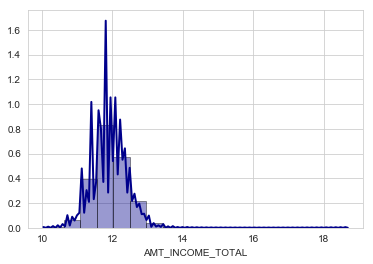

In [57]:
sns.distplot(np.log1p(Train_data['AMT_INCOME_TOTAL']), hist=True, kde=True, 
             bins=int(180/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

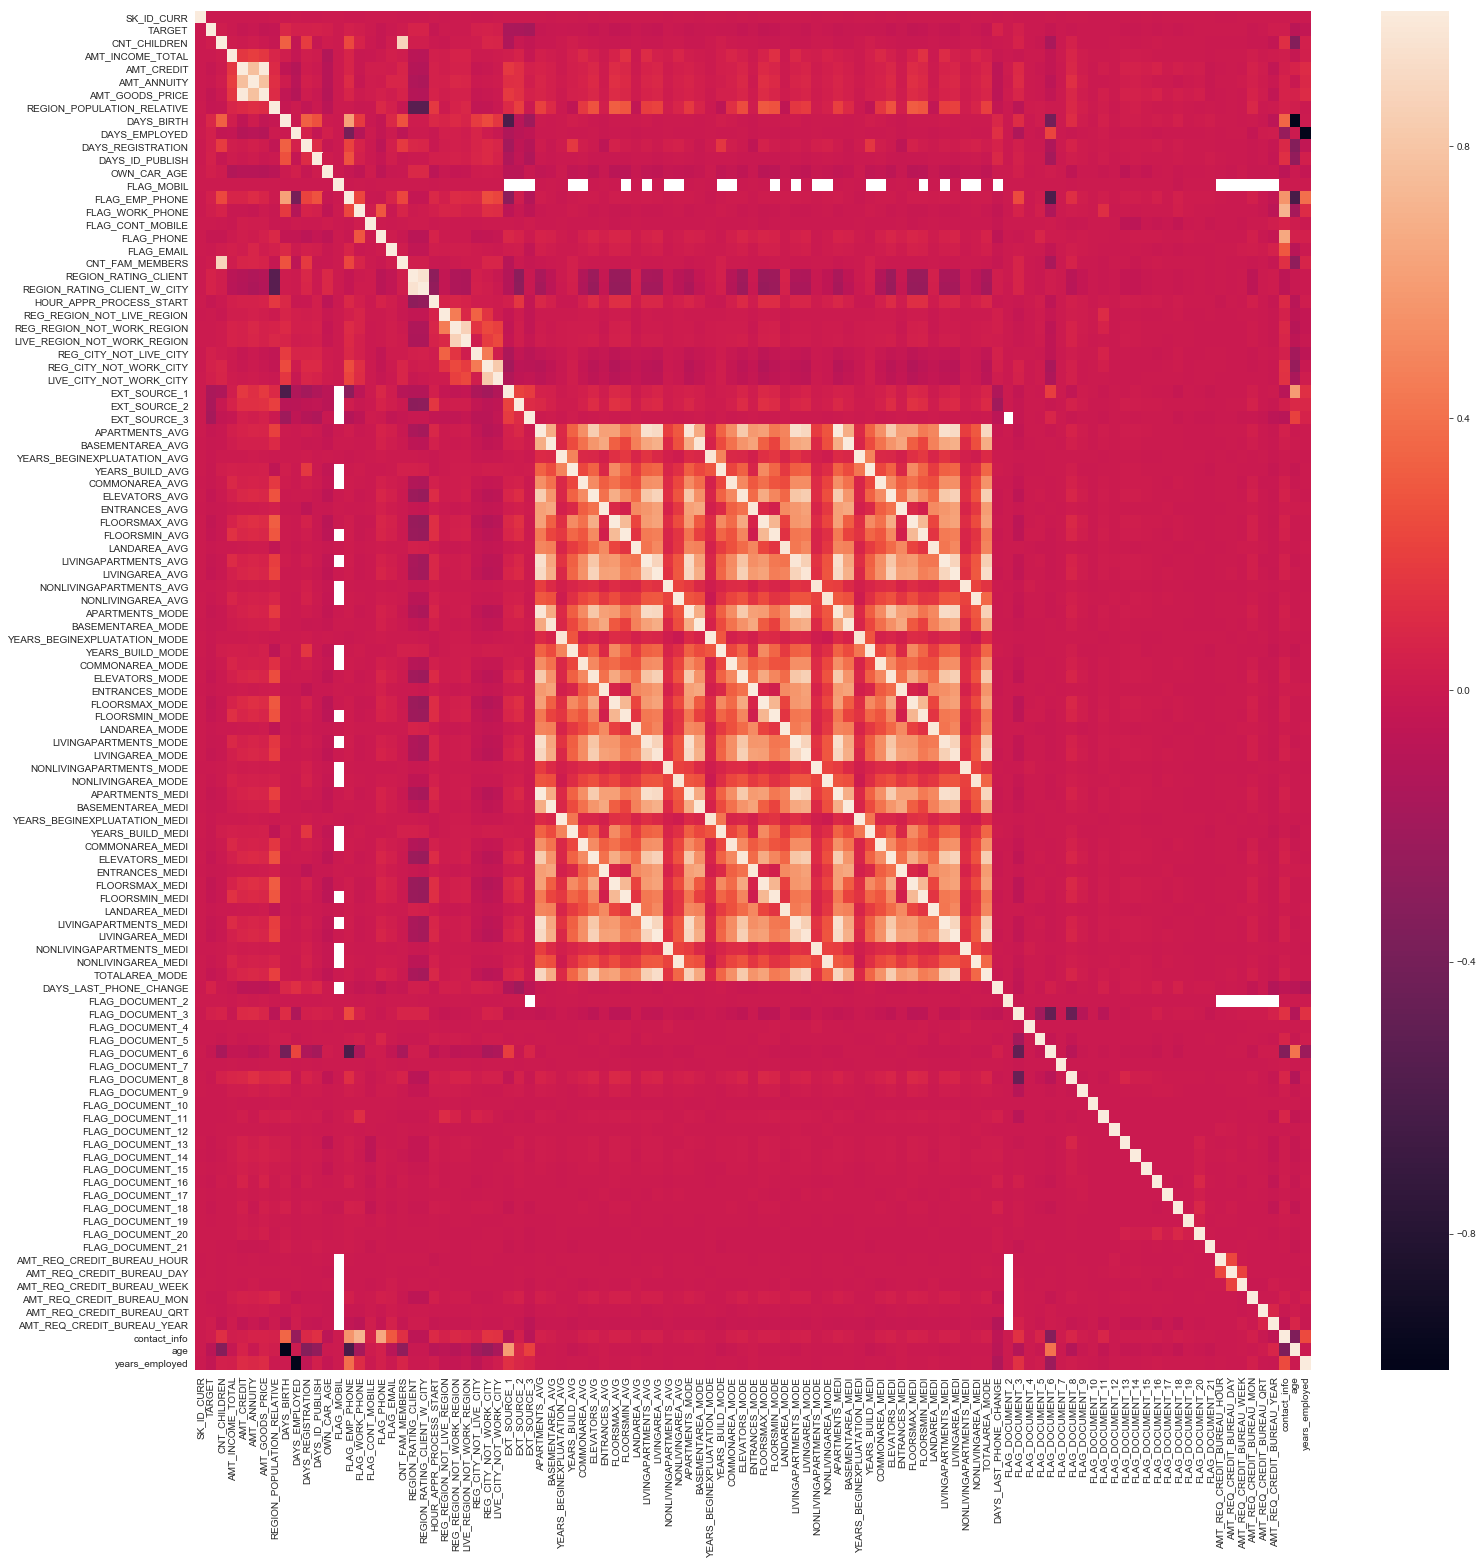

In [58]:
corr = Train_data.corr()
plt.figure(figsize=[25, 25])
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [60]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_b_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = Train_data.loc[Train_data['TARGET'] != 0]
    t0 = Train_data.loc[Train_data['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

<Figure size 432x288 with 0 Axes>

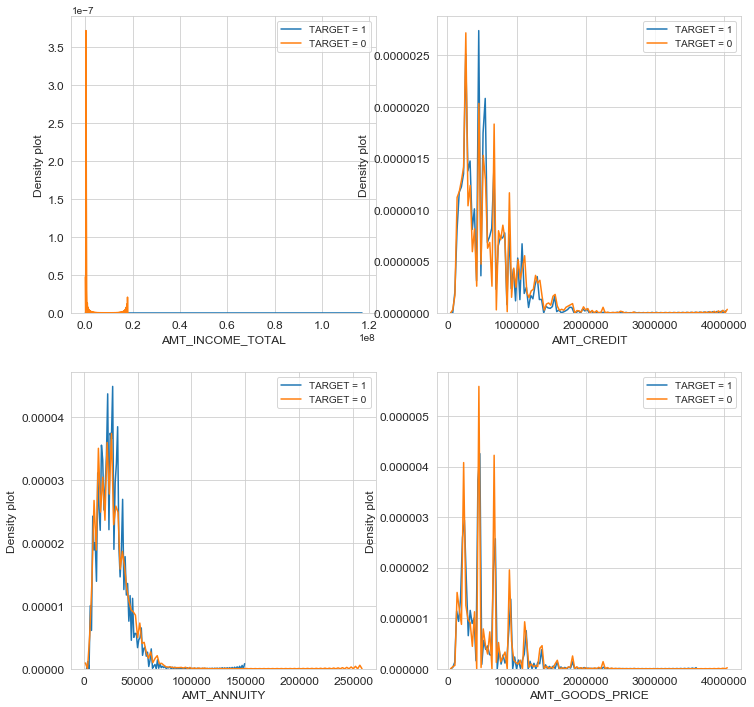

In [61]:
var = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
plot_b_distribution_comp(var, nrow=2)

# Correlations

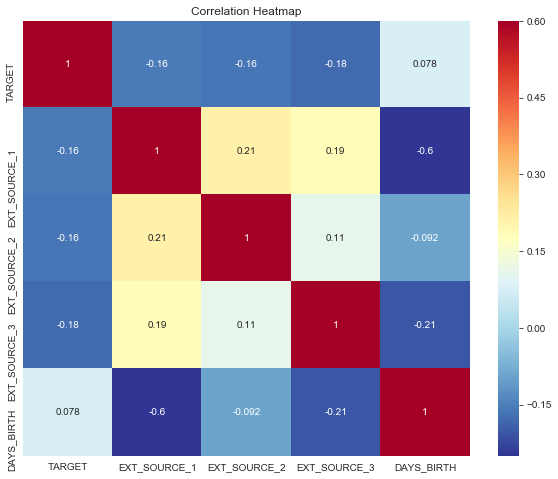

In [63]:
# Heatmap of correlations
var = ['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']
ext_data = Train_data[var]
ext_data_corrs = ext_data.corr();
plt.figure(figsize = (10, 8))
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [71]:
correlations = Train_data.corr()['TARGET'].sort_values()

In [72]:
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 FLAG_WORK_PHONE                0.028524
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.046052
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
age                          -0.078239
years_employed               -0.046052
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226


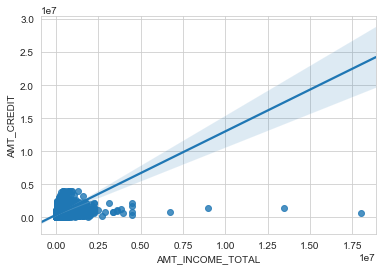

In [68]:
#Is the relationship between total income and credit amount linear?
sns.regplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", data=Train_data[Train_data.TARGET == 0])

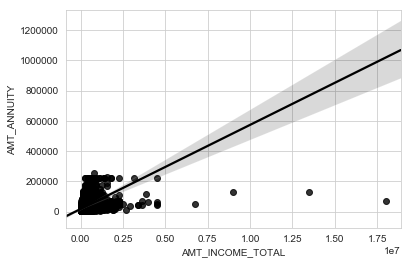

In [69]:
sns.regplot(x="AMT_INCOME_TOTAL", y="AMT_ANNUITY", data=Train_data[Train_data.TARGET == 0], color = 'Black')

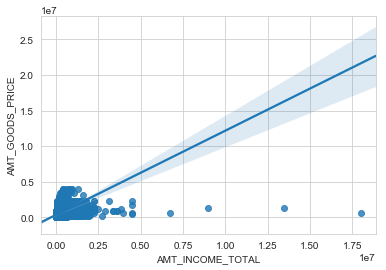

In [73]:
sns.regplot(x="AMT_INCOME_TOTAL", y="AMT_GOODS_PRICE", data=Train_data[Train_data.TARGET == 0])

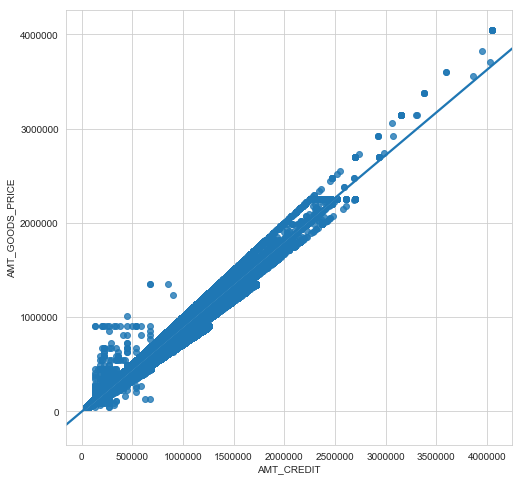

In [74]:
plt.figure(figsize=[8, 8])
sns.regplot(x="AMT_CREDIT", y="AMT_GOODS_PRICE", data=Train_data[Train_data.TARGET == 0])

# Feature Selection

In [75]:
# Identify missing values above threshold
missing_values = missing_values.index[missing_values > 0.75]
missing_values = missing_values_test.index[missing_values_test> 0.75]

all_missing = list(set(set(train_missing) | set(test_missing)))
print('There are %d columns with more than 75%% missing values' % len(all_missing))

IndexError: too many indices for array